# MNIST Trabalhando com imagens de dígitos

MNIST um data set com imagens de 20000 handwritten dígitos 28 x 28.

In [3]:
import pandas as pd
import tensorflow as tf

mnist = pd.read_csv('/content/sample_data/mnist_train_small.csv',header=None)


In [28]:
mnist.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
mnist.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            775, 776, 777, 778, 779, 780, 781, 782, 783, 784],
           dtype='int64', length=785)

In [11]:
mnist.shape

(20000, 785)

# plot das imagens

In [38]:

tf.Variable(mnist[0]) # mnist[0] = Coluna 0

<tf.Variable 'Variable:0' shape=(20000,) dtype=int64, numpy=array([6, 5, 7, ..., 2, 9, 5])>

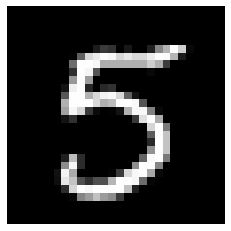

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
# mnist.iloc[1][1::] => Linha 0 e Coluna de 1 até o último
# Portanto, no código abaixo, eu localizo todos os valores da linha '1' até a 
# última coluna '784' e aplico um reshape para o formato [28,28]
plt.imshow(tf.reshape( tf.Variable(mnist.iloc[1][1::]) , [28,28]), cmap='gray')
plt.axis('off')
plt.show()

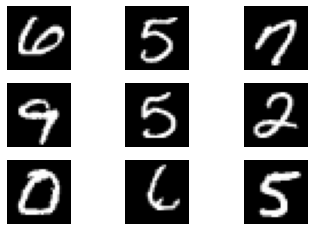

In [126]:
for i in range(9):
  ax = plt.subplot(3,3,i+1)
  ax.imshow(tf.reshape( tf.Variable(mnist.iloc[i][1::]) , [28,28]), cmap='gray')
  plt.axis('off')

plt.show()

# Exercício

Empregue o modelo de código abaixo para gerar o conjunto da dados das imagens e de seus labels em tensores. Gere ao menos 100 elementos dos 20000.

In [59]:
# modelo

mnist_tf = tf.Variable(tf.zeros([20000, 28, 28], tf.int64))#...<uma matriz 28x28 de ZEROS para cada dígito> )Tensor.set_shape
mnist_tf_labels = tf.Variable(mnist[0])#...<os rótulos de cada dígito>  )
print(mnist_tf.shape)

# # cuidado... mnist[0] é a coluna 0, mnist.iloc[0] é a linha 0!!!
for i in range(100): # only 100
  mnist_tf[i].assign( tf.reshape(tf.Variable(mnist.iloc[i][1::]) , [28,28]))# ...<os dados das imagens> ))
  

(20000, 28, 28)


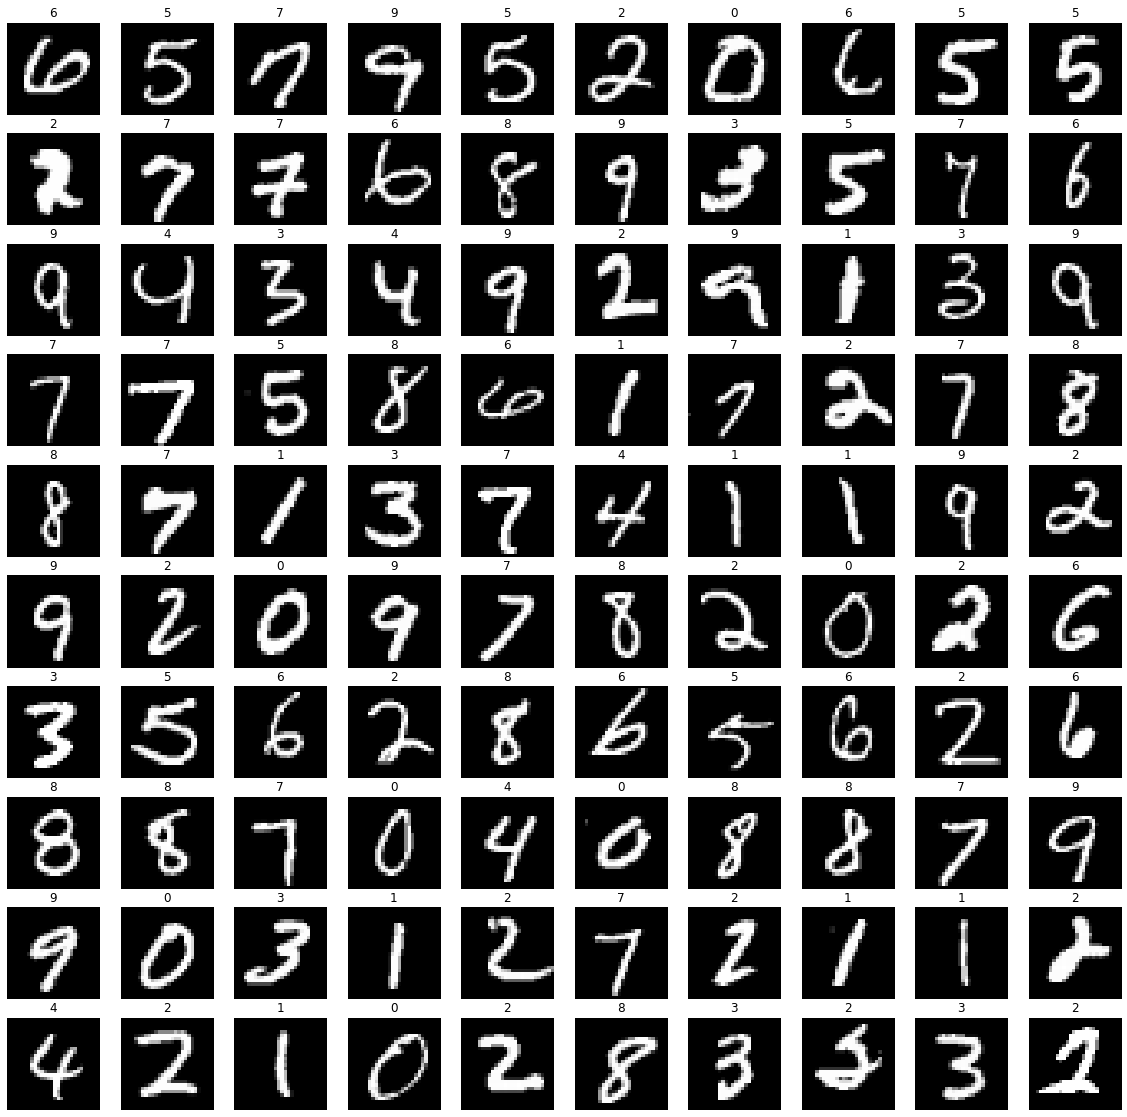

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

for i in range(100):
  ax = plt.subplot(10,10,i+1)
  ax.imshow(mnist_tf[i], cmap='gray')
  ax.set_title(str(mnist_tf_labels[i].numpy()))
  plt.axis('off')

plt.show()

# Trabalhando com imagens fotográficas (RGB)

In [62]:
from tensorflow.keras import datasets, layers, models

In [64]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [65]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [66]:
type(train_images)

numpy.ndarray

In [67]:
train_images.shape

(50000, 32, 32, 3)

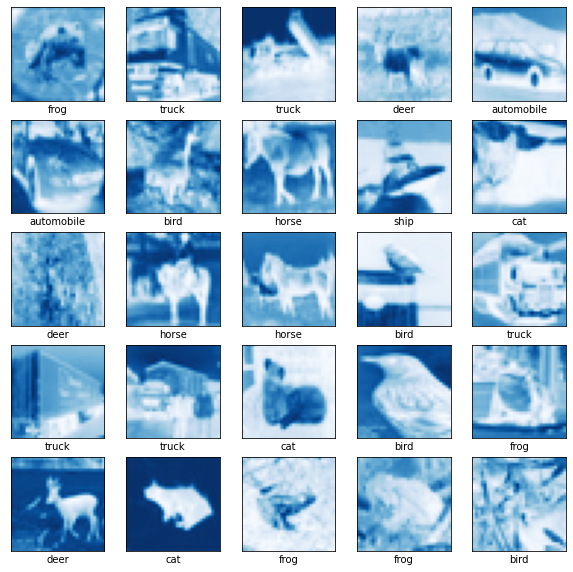

In [126]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i,:,:,0] , cmap='Blues')
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Exercício

Altere o código acima para exibir somente uma componente RGB das imagens.